In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from skimage import img_as_float

# 1. Contrast Stretching

In [2]:
def Contrast_stretched (Y):
    Y_str = np.copy(Y)
    R1,G1,B1 = cv2.split(Y_str)
    R_str = ((R-np.min(R))/(np.max(R)-np.min(R)))*255
    G_str = ((G-np.min(G))/(np.max(G)-np.min(G)))*255
    B_str = ((B-np.min(B))/(np.max(B)-np.min(B)))*255
    Y_str[ : , : , 0] = R_str 
    Y_str[ : , : , 1] = G_str 
    Y_str[ : , : , 2] = B_str 
    return Y_str

# 2. Gray World Algorithm

In [3]:
def Gray_Algo (G):
    G_gray = np.copy(G)
    R1,G1,B1 = cv2.split(G_gray)
    H1 = G_gray.shape[0]
    W1 = G_gray.shape[1]
    spec_R = np.sum(R1)/(H1*W1)
    spec_G = np.sum(G1)/(H1*W1)
    spec_B = np.sum(B1)/(H1*W1)
    scale = (spec_R+spec_G+spec_B)/3
    R_ave = (np.sum(R1)/(R1.shape[0]*R1.shape[1]))
    G_ave = (np.sum(G1)/(G1.shape[0]*G1.shape[1]))
    B_ave = (np.sum(B1)/(B1.shape[0]*B1.shape[1]))
    R_wb = (R1/R_ave)*scale
    G_wb = (G1/G_ave)*scale
    B_wb = (B1/B_ave)*scale
    G_gray[ : , : , 0] = R_wb
    G_gray[ : , : , 1] = G_wb
    G_gray[ : , : , 2] = B_wb
    return G_gray
    

# 3. White Patch Algorithm

In [4]:
def White_patch1 (x,y):
    W_white = np.copy(x)
    w = np.copy(y)
    R1,G1,B1 = cv2.split(W_white)
    R2,G2,B2 = cv2.split(w)
    H1 = w.shape[0]
    W1 = w.shape[1]
    spec_R = np.sum(R2)/(H1*W1)
    spec_G = np.sum(G2)/(H1*W1)
    spec_B = np.sum(B2)/(H1*W1)
    scale = (spec_R+spec_G+spec_B)/3
    R_ave = (np.sum(R2)/(R2.shape[0]*R2.shape[1]))
    G_ave = (np.sum(G2)/(G2.shape[0]*G2.shape[1]))
    B_ave = (np.sum(B2)/(B2.shape[0]*B2.shape[1]))
    R_wb = (R1/R_ave)*scale
    G_wb = (G1/G_ave)*scale
    B_wb = (B1/B_ave)*scale
    W_white[ : , : , 0] = R_wb
    W_white[ : , : , 1] = G_wb
    W_white[ : , : , 2] = B_wb
    return W_white

## RESULTS

## Original Image

Imin :  0 Imax : 253
MinR:  20 MaxR:  253
MinG:  0 MaxR:  233
MinB:  0 MaxR:  180


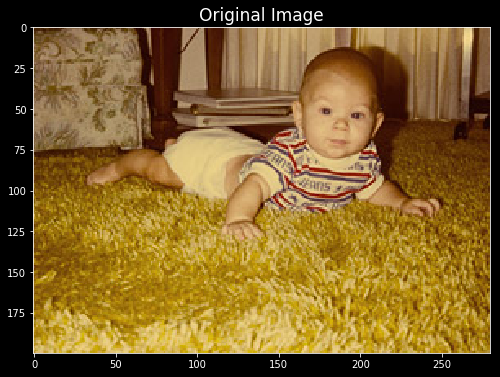

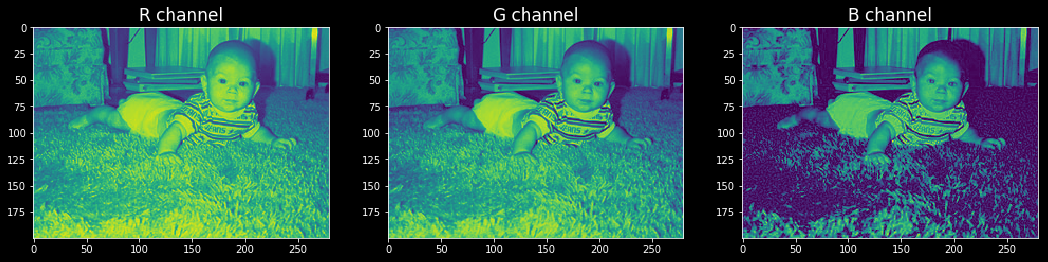

In [3]:
M = cv2.cvtColor(cv2.imread('baby.jpg'), cv2.COLOR_BGR2RGB)
R,G,B = cv2.split(M)
m = cv2.cvtColor(cv2.imread('baby_w.jpg'), cv2.COLOR_BGR2RGB)
#Details
Imin = np.min(M)
Imax = np.max(M)

print('Imin : ', Imin, 'Imax :', Imax)
print('MinR: ',np.min(R),'MaxR: ',np.max(R))
print('MinG: ',np.min(G),'MaxR: ',np.max(G))
print('MinB: ',np.min(B),'MaxR: ',np.max(B))

plt.style.use('dark_background')
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.imshow(M)
plt.title('Original Image')
plt.show()

plt.figure(figsize=[18,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(131)
plt.imshow(R)
plt.title('R channel')
plt.subplot(132)
plt.imshow(G)
plt.title('G channel')
plt.subplot(133)
plt.imshow(B)
plt.title('B channel')
plt.show()

## Output

Contrast Stretched Values
MinR:  0 MaxR:  255
MinG:  0 MaxR:  255
MinB:  0 MaxR:  255


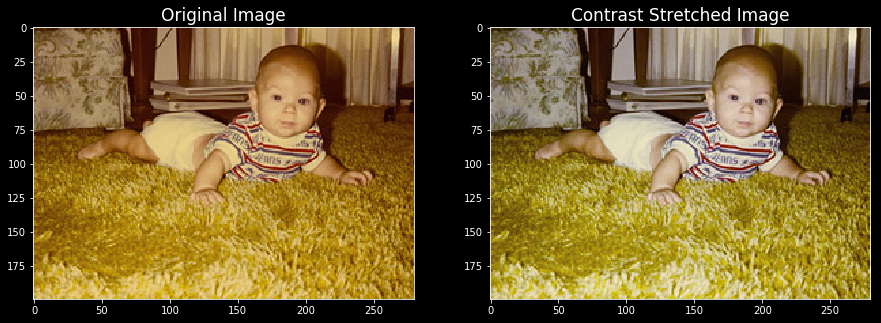

Gray World-treated Values
MinR:  13 MaxR:  175
MinG:  0 MaxR:  212
MinB:  0 MaxR:  255


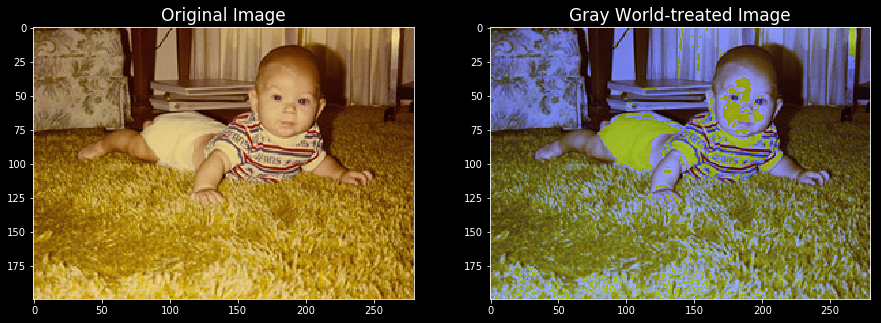

White Patched Values
MinR:  16 MaxR:  209
MinG:  0 MaxR:  217
MinB:  0 MaxR:  250


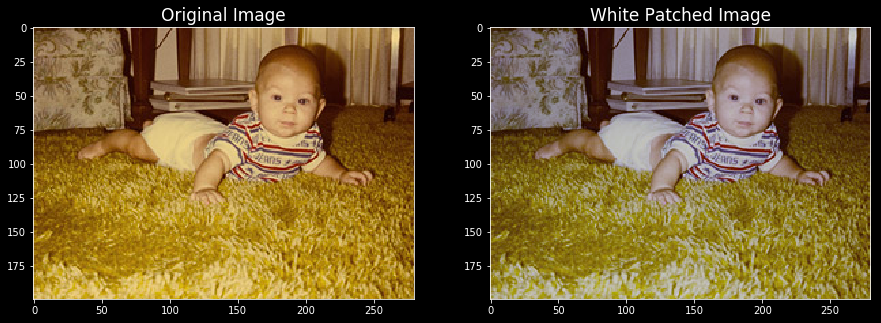

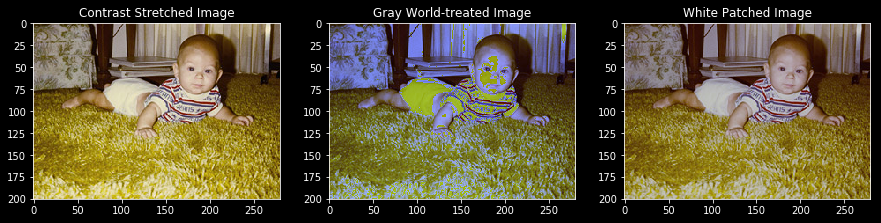

In [6]:
M_str = Contrast_stretched(M)
R1,G1,B1 = cv2.split(M_str)

G_gray = Gray_Algo(M)
R2,G2,B2 = cv2.split(G_gray)

W_white = White_patch1(M,m)
R3,G3,B3 = cv2.split(W_white)

print('Contrast Stretched Values')
print('MinR: ',np.min(R1),'MaxR: ',np.max(R1))
print('MinG: ',np.min(G1),'MaxR: ',np.max(G1))
print('MinB: ',np.min(B1),'MaxR: ',np.max(B1))

plt.style.use('dark_background')
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(M_str)
plt.title('Contrast Stretched Image')
plt.show()

print('Gray World-treated Values')
print('MinR: ',np.min(R2),'MaxR: ',np.max(R2))
print('MinG: ',np.min(G2),'MaxR: ',np.max(G2))
print('MinB: ',np.min(B2),'MaxR: ',np.max(B2))

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(G_gray)
plt.title('Gray World-treated Image')
plt.show()

print('White Patched Values')
print('MinR: ',np.min(R3),'MaxR: ',np.max(R3))
print('MinG: ',np.min(G3),'MaxR: ',np.max(G3))
print('MinB: ',np.min(B3),'MaxR: ',np.max(B3))

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(M)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(W_white)
plt.title('White Patched Image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 12
plt.subplot(131)
plt.imshow(M_str)
plt.title('Contrast Stretched Image')
plt.subplot(132)
plt.imshow(G_gray)
plt.title('Gray World-treated Image')
plt.subplot(133)
plt.imshow(W_white)
plt.title('White Patched Image')
plt.show()

# White Patch Algorithm

## Original Image

Imin :  0 Imax : 244
MinR:  76 MaxR:  244
MinG:  0 MaxR:  220
MinB:  12 MaxR:  216


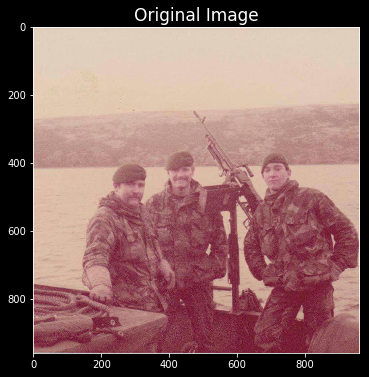

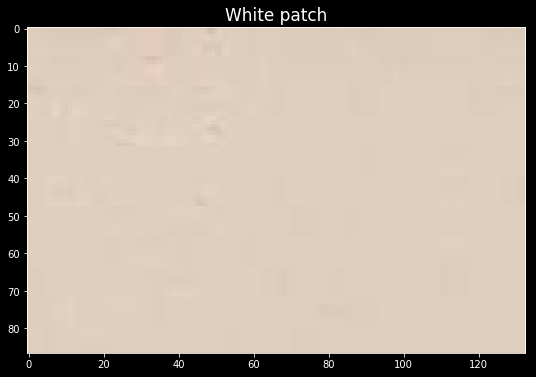

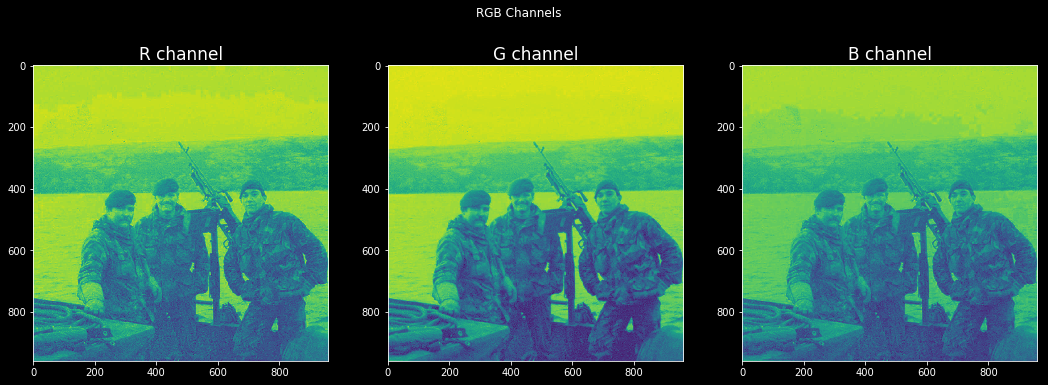

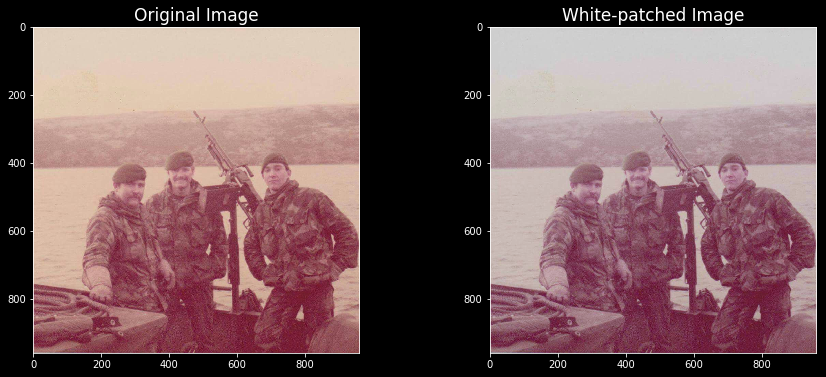

In [7]:
W = cv2.cvtColor(cv2.imread('ss.jpg'), cv2.COLOR_BGR2RGB)
w= cv2.cvtColor(cv2.imread('ss2_w.jpg'), cv2.COLOR_BGR2RGB)
R,G,B = cv2.split(W)
R1,G1,B1= cv2.split(w)
#Details
Imin = np.min(W)
Imax = np.max(W)

print('Imin : ', Imin, 'Imax :', Imax)
print('MinR: ',np.min(R),'MaxR: ',np.max(R))
print('MinG: ',np.min(G),'MaxR: ',np.max(G))
print('MinB: ',np.min(B),'MaxR: ',np.max(B))

def White_patch1 (x,y):
    W_white = np.copy(x)
    w = np.copy(y)
    R1,G1,B1 = cv2.split(W_white)
    R2,G2,B2 = cv2.split(w)
    H1 = w.shape[0]
    W1 = w.shape[1]
    spec_R = np.sum(R2)/(H1*W1)
    spec_G = np.sum(G2)/(H1*W1)
    spec_B = np.sum(B2)/(H1*W1)
    scale = (spec_R+spec_G+spec_B)/3
    R_ave = (np.sum(R2)/(R2.shape[0]*R2.shape[1]))
    G_ave = (np.sum(G2)/(G2.shape[0]*G2.shape[1]))
    B_ave = (np.sum(B2)/(B2.shape[0]*B2.shape[1]))
    R_wb = (R1/R_ave)*scale
    G_wb = (G1/G_ave)*scale
    B_wb = (B1/B_ave)*scale
    W_white[ : , : , 0] = R_wb
    W_white[ : , : , 1] = G_wb
    W_white[ : , : , 2] = B_wb
    return W_white

final_w = White_patch1(W,w)

plt.style.use('dark_background')
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.imshow(W)
plt.title('Original Image')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.imshow(w)
plt.title('White patch')
plt.show()

plt.figure(figsize=[18,6])
plt.rcParams['axes.titlesize'] = 17
plt.suptitle('RGB Channels')
plt.subplot(131)
plt.imshow(R)
plt.title('R channel')
plt.subplot(132)
plt.imshow(G)
plt.title('G channel')
plt.subplot(133)
plt.imshow(B)
plt.title('B channel')
plt.show()

plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(W)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(final_w)
plt.title('White-patched Image')
plt.show()


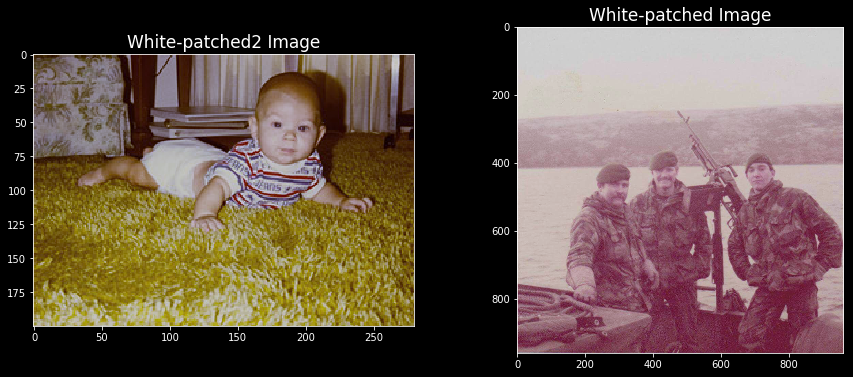

In [8]:
plt.figure(figsize=[15,6])
plt.rcParams['axes.titlesize'] = 17
plt.subplot(121)
plt.imshow(W_white)
plt.title('White-patched2 Image')
plt.subplot(122)
plt.imshow(final_w)
plt.title('White-patched Image')
plt.show()

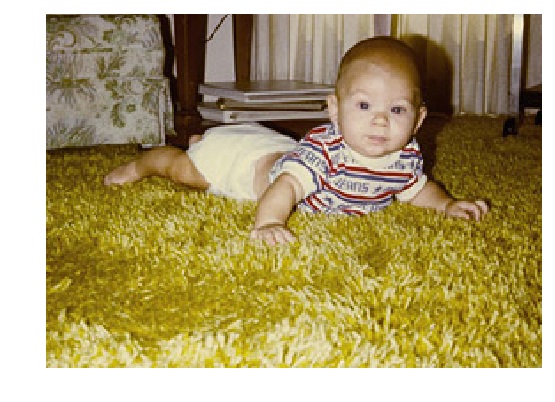

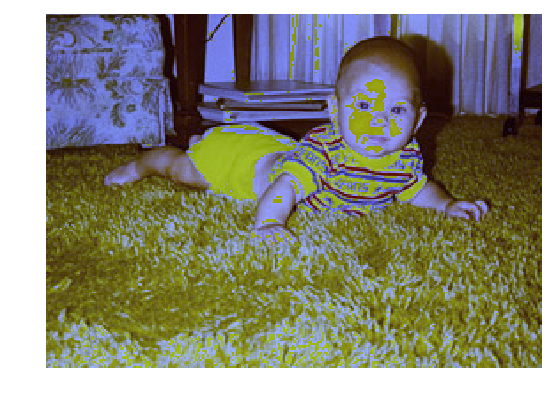

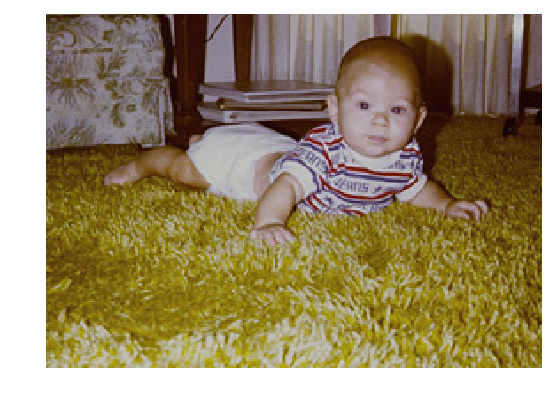

In [9]:
plt.style.use('default')
plt.imshow(M_str)
plt.axis('off')
plt.show()

plt.style.use('default')
plt.imshow(G_gray)
plt.axis('off')
plt.show()

plt.style.use('default')
plt.imshow(W_white)
plt.axis('off')
plt.show()